In [20]:
"""
Author: Rainy
Date: Oct 3 2019
"""

'\nAuthor: Rainy\nDate: Oct 3 2019\n'

In [21]:
# set up
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [36]:
# load data
files = []
for i in range(2,12):
    file_names = 'Stream ({}).xlsx'.format(i)
    files.append(file_names)

df_twitter = pd.DataFrame()
for file in files:
    df_twitter = pd.concat([df_twitter,pd.read_excel(file, sheetname = 'Stream')])

In [37]:
# non-twitter data
df_non_twitter = pd.concat([pd.read_excel('T Only 3_1_2017 thru 6_30_2017 Random Stream (1).xlsx', sheetname='Stream'),
                           pd.read_excel('T Only 9_1_2017 thru 10_31_2017 Random Stream (1).xlsx', sheetname='Stream')])


# Data inspection and data preprocessing

In [41]:
df_twitter.shape, df_non_twitter.shape

((443273, 41), (69548, 41))

In [43]:
df_twitter.columns, df_non_twitter.columns

(Index(['Post ID', 'Sound Bite Text', 'Ratings and Scores', 'Title',
        'Source Type', 'Post Type', 'Media Type', 'URL', 'Domain',
        'Published Date (GMT-04:00) New York', 'Author Gender', 'Author URL',
        'Author Name', 'Author Handle', 'Author ID',
        'Author Location - Country 1', 'Author Location - State/Province 1',
        'Author Location - City 1', 'Author Location - Country 2',
        'Author Location - State/Province 2', 'Author Location - City 2',
        'Author Location - Other', 'No. of Followers/Daily Unique Visitors',
        'Professions', 'Interests', 'Positive Objects', 'Negative Objects',
        'Richness', 'Tags', 'Quoted Post', 'Quoted Author Name',
        'Quoted Author Handle', 'Total Engagements', 'Post Comments',
        'Post Likes', 'Post Shares', 'Post Views', 'Post Dislikes',
        'Product Name', 'Product Hierarchy', 'Rating'],
       dtype='object'),
 Index(['Post ID', 'Sound Bite Text', 'Ratings and Scores', 'Title',
        'S

In [45]:
# join twitter and non-twitter dataset together
df = pd.concat([df_twitter,df_non_twitter])

In [49]:
# drop not actionable data
df.drop(columns = ["Post ID", "URL"], inplace = True)

In [51]:
df.drop(columns = ['Domain', 'Author URL','Author Handle','Author Location - State/Province 1', 'Author Location - State/Province 2', 'Author Location - City 2',
        'Author Location - Other'], inplace = True)

In [52]:
df.shape

(512821, 32)

In [60]:
# post features inspect
df.iloc[:,19:].head()

,Tags,Quoted Post,Quoted Author Name,Quoted Author Handle,Total Engagements,Post Comments,Post Likes,Post Shares,Post Views,Post Dislikes,Product Name,Product Hierarchy,Rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
len(df)

512821

In [62]:
df.iloc[:,19:].isnull().sum()

Tags                    512821
Quoted Post             512512
Quoted Author Name      512512
Quoted Author Handle    512512
Total Engagements       460347
Post Comments           482202
Post Likes              462568
Post Shares             511653
Post Views              512821
Post Dislikes           512821
Product Name            501423
Product Hierarchy       512821
Rating                  510543
dtype: int64

In [90]:
df.drop(columns = ['Author Location - City 1','Author Location - Country 2'],inplace = True)

In [64]:
# drop columns with all information missing
for col in df.columns:
    if df[col].isnull().sum() == len(df):
        df.drop(columns = [col], inplace = True)

In [91]:
df.columns

Index(['Sound Bite Text', 'Title', 'Source Type', 'Post Type', 'Media Type',
       'Published Date (GMT-04:00) New York', 'Author Gender', 'Author Name',
       'Author ID', 'Country', 'No. of Followers/Daily Unique Visitors',
       'Professions', 'Interests', 'Positive Objects', 'Negative Objects',
       'Richness', 'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle',
       'Total Engagements', 'Post Comments', 'Post Likes', 'Post Shares',
       'Product Name', 'Rating'],
      dtype='object')

In [92]:
df.shape

(512821, 25)

In [68]:
# datetime conversion
df["Published Date (GMT-04:00) New York"].dtype

dtype('O')

In [69]:
df["Published Date (GMT-04:00) New York"] = pd.to_datetime(df["Published Date (GMT-04:00) New York"])

# EDA 
## Users Demography and Market Research

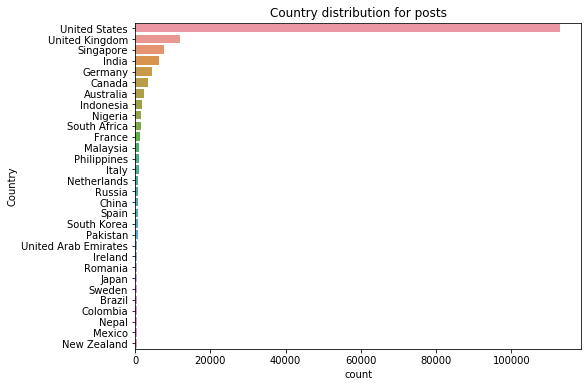

In [108]:
# where they come from
df = df.rename(columns={"Author Location - Country 1" : "Country"})
plt.figure(figsize = (8,6))
sns.countplot(y = df["Country"], order = df["Country"].value_counts().index[:30])
plt.title("Country distribution for posts")
plt.show()

A large majority of the population are from US, followed by UK, Singapore, India, Germany, and Canada, and Australia. We can further interpret the result based on the continents of different markets.

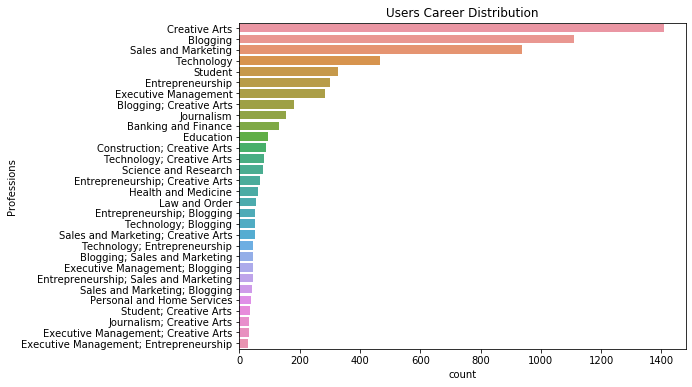

In [106]:
plt.figure(figsize = (8,6))
ax = sns.countplot(y= df["Professions"],order=df['Professions'].value_counts().index[:30])
plt.title("Users Career Distribution")
plt.show()

Most of the reviewers are in the career of creative arts, blogging, sales/marketing, technology, students, and managements. This is interesting and we can further interpret the review analysis based on the major categories of the careers, and we can even group similar careers together.

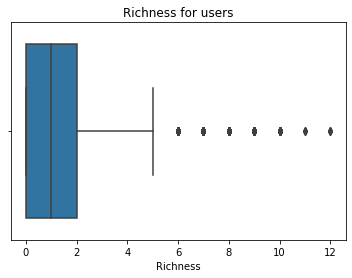

In [145]:
sns.boxplot(x = df["Richness"])
plt.title("Richness for users")
plt.show()

So apparently most users rate themselves from 0 to 4,with the max richness score around 12. Although the richness is not clear on the measurement standard, we can still assume that most users are not super duper rich, at least according to themselves, meaning that this market reserach demography has an income level that is not too obnoxious.

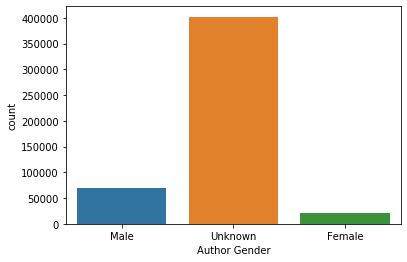

In [138]:
sns.countplot(df["Author Gender"])
plt.show()

Male reviewers are more than female, based on the information we have.

## Reivew Features Analysis

In [116]:
df.loc[:,['Source Type', 'Post Type', 'Media Type']].describe()

,Source Type,Post Type,Media Type
count,493173,493173,493173
unique,9,3,15
top,Blogs,Original,No Media
freq,172673,410270,244291


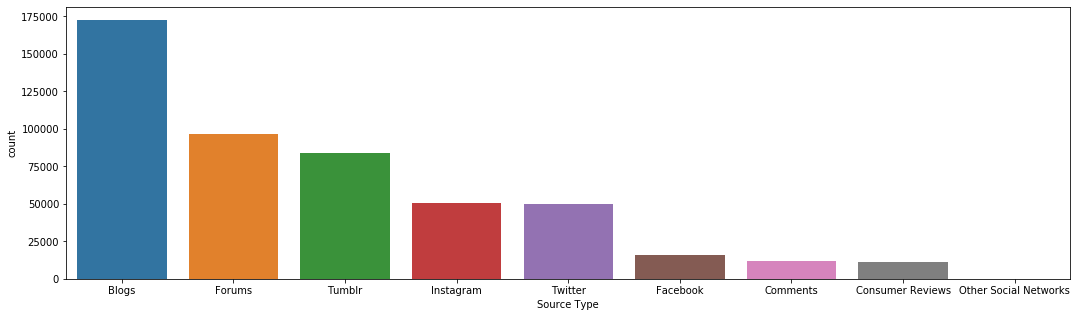

In [124]:
plt.figure(figsize = (18,5))
sns.countplot(df["Source Type"], order = df["Source Type"].value_counts().index)
plt.show()

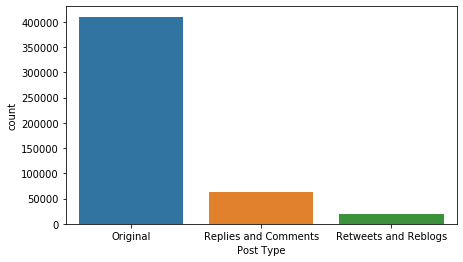

In [131]:
plt.figure(figsize = (7,4))
sns.countplot(df["Post Type"], order = df["Post Type"].value_counts().index)
plt.show()

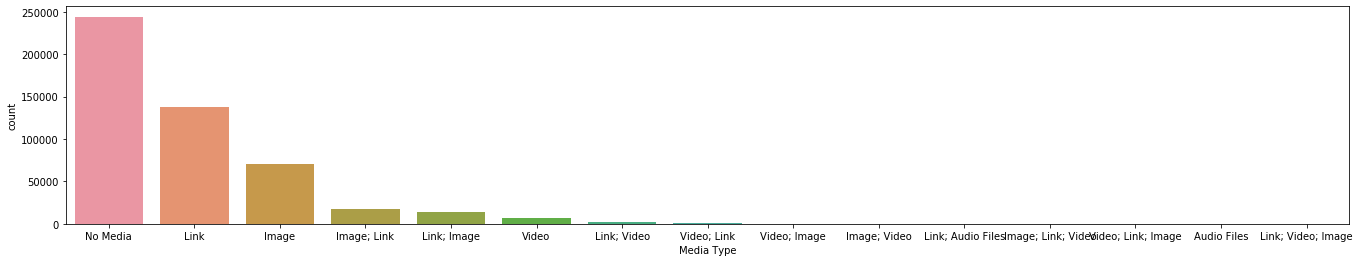

In [135]:
plt.figure(figsize = (23,4))
sns.countplot(df["Media Type"], order = df["Media Type"].value_counts().index)
plt.show()